In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as s

https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

CARGA DE DATASET

In [2]:
df_heart = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df_heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df_heart.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

CORRELACIONES

In [5]:
cols = ['age', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']

df_heart[cols].corr()

,age,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
creatinine_phosphokinase,-0.081584,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316
smoking,0.018668,0.002421,-0.147173,-0.067315,-0.055711,0.028234,-0.027414,0.004813,0.445892,1.000000,-0.022839,-0.012623


<Axes: >

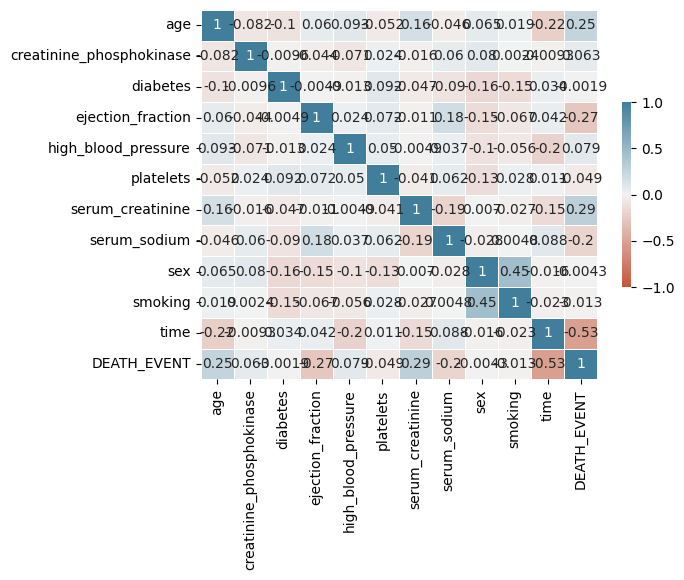

In [6]:
sns.heatmap(
    data=df_heart[cols].corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

RELACION ENTRE FUMAR Y MUERTE

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

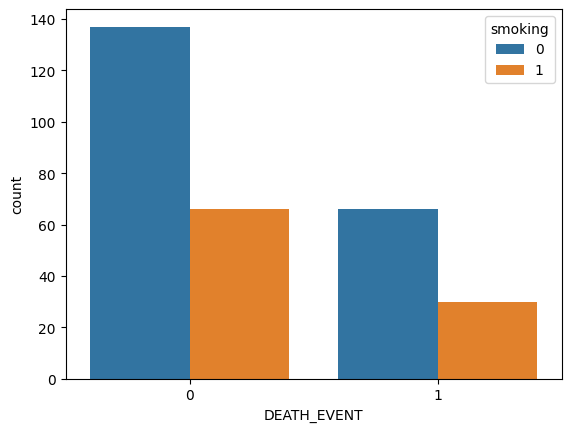

In [8]:
sns.countplot(x='DEATH_EVENT',hue='smoking',data=df_heart)

REGRESIÓN LOGISTICA

In [9]:
smf.logit(
    formula='DEATH_EVENT ~ age + creatinine_phosphokinase + diabetes + ejection_fraction + high_blood_pressure + platelets + serum_creatinine + serum_sodium + sex + smoking + time',
    data=df_heart
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.367148
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Tue, 27 Aug 2024   Pseudo R-squ.:                  0.4151
Time:                        03:13:34   Log-Likelihood:                -109.78
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 9.732e-28
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.1896      5.652      1.803      0.071      -0.888      21.267
age                          0.0474      0.016      3.001      0.003       0.016       0.078
creatinine_phosphokinase     0.0002      0.000      1.271      0.204      -0.000       0.001
diabetes                     0.1452      0.351      0.414      0.679      -0.543       0.833
ejection_fraction           -0.0767      0.016     -4.696      0.000      -0.109      -0.045
high_blood_pressure         -0.1027      0.359     -0.286      0.775      -0.806       0.600
platelets                -1.199e-06   1.89e-06     -0.635      0.526    -4.9e-06     2.5e-06
serum_creatinine             0.6660      0.181      3.670      0.000       0.310       1.022
serum_sodium                -0.0671      0.040     -1.694      0.090      -0.145       0.011
sex                         -0.5330      0.413     -1.291      0.197      -1.342       0.276
smoking                     -0.0124      0.409     -0.030      0.976      -0.814       0.789
time                        -0.0210      0.003     -7.053      0.000      -0.027      -0.015
============================================================================================
"""

In [10]:
model_heart = smf.logit(
    formula='DEATH_EVENT ~ age +  ejection_fraction + serum_creatinine + serum_sodium + time',
    data=df_heart
).fit()
model_heart.summary()

Optimization terminated successfully.
         Current function value: 0.373723
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            5
Date:                Tue, 27 Aug 2024   Pseudo R-squ.:                  0.4046
Time:                        03:23:02   Log-Likelihood:                -111.74
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 5.358e-31
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.4930      5.406      1.756      0.079      -1.102      20.088
age                   0.0425      0.015      2.825      0.005       0.013       0.072
ejection_fraction    -0.0734      0.016     -4.652      0.000      -0.104      -0.042
serum_creatinine      0.6860      0.174      3.941      0.000       0.345       1.027
serum_sodium         -0.0646      0.038     -1.682      0.093      -0.140       0.011
time                 -0.0209      0.003     -7.166      0.000      -0.027      -0.015
=====================================================================================
"""

In [11]:
heart_predictions = pd.DataFrame(
    dict(
        actual_value=df_heart.DEATH_EVENT,
        predicted_value=model_heart.predict().round()
    )
)
heart_predictions

,actual_value,predicted_value
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
294,0,0.0
295,0,0.0
296,0,0.0
297,0,0.0


In [12]:
(
    heart_predictions
    .value_counts(['actual_value','predicted_value'])
    .reset_index(name='count')
)

,actual_value,predicted_value,count
0,0,0.0,184
1,1,1.0,66
2,1,0.0,30
3,0,1.0,19


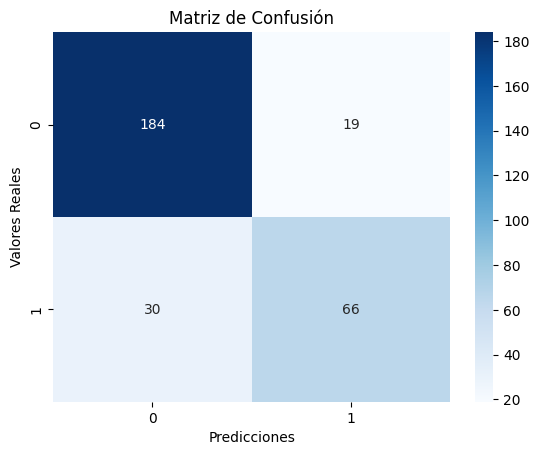

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de confusión
conf_matrix = confusion_matrix(heart_predictions['actual_value'], heart_predictions['predicted_value'])

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Añadir etiquetas y título
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()